# About
### Author:
    Thiago Luis Rodrigues Pinho @AILAB 
### Start Date:
    16/04/2020
### Objectives:
    Develop a clustering algorithm using k-means and represent those cluster distances for ALEI project
### Summary:
    1. Loading Data
         1.1 Sampling Data
    2. Counting and Vectorizing
    3. Clustiring with k-means
        3.1 Finding the optimal number of clusters
        3.2 Evaluting the optimal number of clusters
    4. Evaluation
        4.1 Time Consumed
        4.2 Similarities Surface
        4.3 Using Similarities To Classify
    5. Bibliography

# [ALEI] IAgrupador com Cluster

In [9]:
from metaflow import Flow, get_metadata, namespace
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage
import numpy as np

%matplotlib inline
plt.style.use('fivethirtyeight')

In [6]:
!python clustering.py show

Metaflow 2.0.5 executing ClusteringKMeans for user:dev

Develop a clustering algorithm using k-means and represent those cluster distances for ALEI project

Summary:
    1. Start
        1.1 Sampling Data
    2. Counting and Vectorizing
    3. Clustiring with k-means
        3.1 Finding the optimal number of clusters
        3.2 Evaluting the optimal number of clusters
    4. Evaluation
        4.1 Time Consumed
        4.2 Similarities Surface
        4.3 Using Similarities To Classify

Step start
    Load preprocessed documents
    => sampling

Step sampling
    Samples a choosen number of rows
    => counting_and_vectorizing

Step counting_and_vectorizing
    Convert the documents to bags of tokens,
    counts them and stores them as frequency vectors
    => finding_optimal_number_of_clusters

Step finding_optimal_number_of_clusters
    To find it, let's use the elbow curve analysis.
    In this analysis we try models from an interval of cluster numbers
    and using each model's cl

In [7]:
!python clustering.py --no-pylint run --tag visualisation --num_samples 500
!python clustering.py --no-pylint run --tag performance --num_samples 1000

Metaflow 2.0.5 executing ClusteringKMeans for user:dev
Validating your flow...
    The graph looks good!
2020-05-25 16:02:17.957 Workflow starting (run-id 1590433337950595):
2020-05-25 16:02:17.962 [1590433337950595/start/1 (pid 17654)] Task is starting.
2020-05-25 16:02:30.113 [1590433337950595/start/1 (pid 17654)] Task finished successfully.
2020-05-25 16:02:30.117 [1590433337950595/sampling/2 (pid 17669)] Task is starting.
2020-05-25 16:02:31.145 [1590433337950595/sampling/2 (pid 17669)] Task finished successfully.
2020-05-25 16:02:31.149 [1590433337950595/counting_and_vectorizing/3 (pid 17674)] Task is starting.
2020-05-25 16:02:40.609 [1590433337950595/counting_and_vectorizing/3 (pid 17674)] Task finished successfully.
2020-05-25 16:02:40.613 [1590433337950595/finding_optimal_number_of_clusters/4 (pid 17681)] Task is starting.
2020-05-25 16:02:47.739 [1590433337950595/finding_optimal_number_of_clusters/4 (pid 17681)] Task finished successfully.
2020-05-25 16:02:47.744 [15904333379

In [25]:
visualisation_run = list(Flow('ClusteringKMeans').runs('visualisation'))[0]
performance_run = list(Flow('ClusteringKMeans').runs('performance'))[0]
print("Using runs: ", str(visualisation_run), str(performance_run))

Using runs:  Run('ClusteringKMeans/1590434527016950') Run('ClusteringKMeans/1590433375484504')


In [33]:
mapped_distances_df = visualisation_run.data.mapped_distances_df
number_clusters, kmeans_score =  visualisation_run.data.number_clusters,  visualisation_run.data.kmeans_score
prediction =  visualisation_run.data.prediction
svd_docs =  visualisation_run.data.svd_docs

performance_mapped_distances = performance_run.data.mapped_distances_df
performance_mapped_predictions = performance_run.data.mapped_predictions_df
total_time = performance_run.data.total_time
mapped_distances_df

,1035663,311123844,311212762,3200787,3689352,1530629,1331896,4937951,310550039,4293907,...,4425992,4505924,4426008,4426022,4453959,3772551,4453885,3927424,4428318,5845272
1035663,1.000000,0.995336,0.994358,0.990220,0.990155,0.989022,0.988480,0.985697,0.984499,0.982018,...,-0.175464,-0.175464,-0.226070,-0.226070,-0.226070,-0.226070,-0.226070,-0.226070,-0.226070,-0.226070
311123844,0.995336,1.000000,0.997609,0.993471,0.993407,0.992665,0.983817,0.981033,0.984404,0.985317,...,-0.178716,-0.178716,-0.229322,-0.229322,-0.229322,-0.229322,-0.229322,-0.229322,-0.229322,-0.229322
311212762,0.994358,0.997609,1.000000,0.994584,0.995797,0.993425,0.984078,0.981294,0.982013,0.986421,...,-0.181106,-0.181106,-0.231712,-0.231712,-0.231712,-0.231712,-0.231712,-0.231712,-0.231712,-0.231712
3200787,0.990220,0.993471,0.994584,1.000000,0.994215,0.988009,0.989494,0.986711,0.977875,0.981004,...,-0.185244,-0.185244,-0.235850,-0.235850,-0.235850,-0.235850,-0.235850,-0.235850,-0.235850,-0.235850
3689352,0.990155,0.993407,0.995797,0.994215,1.000000,0.993794,0.983709,0.980926,0.977810,0.986789,...,-0.185309,-0.185309,-0.235915,-0.235915,-0.235915,-0.235915,-0.235915,-0.235915,-0.235915,-0.235915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772551,-0.226070,-0.229322,-0.231712,-0.235850,-0.235915,-0.236657,-0.226676,-0.223566,-0.213725,-0.244005,...,0.949394,0.949394,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4453885,-0.226070,-0.229322,-0.231712,-0.235850,-0.235915,-0.236657,-0.226676,-0.223566,-0.213725,-0.244005,...,0.949394,0.949394,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3927424,-0.226070,-0.229322,-0.231712,-0.235850,-0.235915,-0.236657,-0.226676,-0.223566,-0.213725,-0.244005,...,0.949394,0.949394,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4428318,-0.226070,-0.229322,-0.231712,-0.235850,-0.235915,-0.236657,-0.226676,-0.223566,-0.213725,-0.244005,...,0.949394,0.949394,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.1 Finding the optimal number of clusters
To find it, let's use the elbow curve analysis. In this analysis we try models from an interval of cluster numbers and using each model's cluster cohesion to score them. 

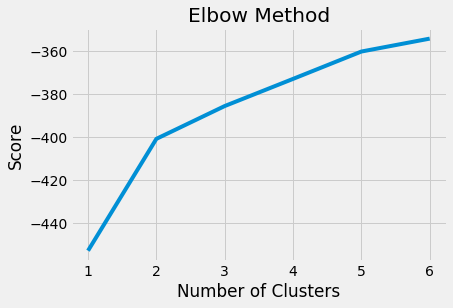

In [27]:
plt.plot(number_clusters, kmeans_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

## 3.2 Evaluting the optimal number of clusters
On the last step we saw how after 3 cluster the improving in score slows down how much it changes.
Let's choose 3 then.

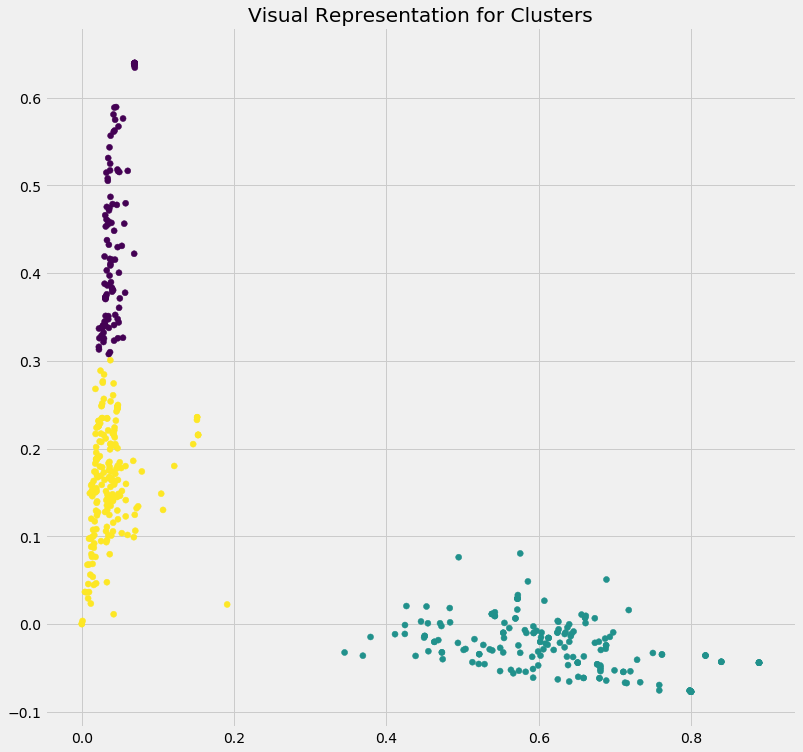

In [28]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(svd_docs[:, 0], svd_docs[:, 1], c=prediction)
plt.title("Visual Representation for Clusters")

plt.show()

# 4. Evaluation

## 4.1 Time Consumed

In [29]:
print("Tempo consumido foi: ", total_time)

Tempo consumido foi:  0:08:19.920579


## 4.2 Similarities Surface
 If we analyses the similarities as if it was a surface we can measure how smooth they change. If the smoothness is high, the less informative the algorithm is to differentiate documents

In [30]:
result = ndimage.laplace(performance_mapped_distances.to_numpy())
surface_roughness = np.average(np.absolute(result))
print("Surface Smoothness(0 to 1): ", 1 - surface_roughness)

Surface Smoothness(0 to 1):  0.9456714787503273


## 4.3 Using Similarities To Classify

In [34]:
predictions_matrix = performance_mapped_predictions.to_numpy()

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
count = 0
for i in range(1, len(predictions_matrix)):
    for j in range(i, len(predictions_matrix)):
        count += 1
        similarity_prediction, true_class = predictions_matrix[i][j]
        if similarity_prediction == true_class:
            if similarity_prediction:
                true_positive += 1
            else:
                true_negative += 1
        else:
            if similarity_prediction:
                false_positive += 1
            else:
                false_negative += 1

accuracy = (true_positive + true_negative)/(true_positive + false_positive + true_negative + false_positive)
precision = true_positive/(true_positive + false_positive)
recall = true_positive/(true_positive + false_negative)
f1_score = 2*(recall * precision)/(recall+precision)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Accuracy:  0.6066803736969304
Precision:  0.5102436804187302
Recall:  0.3399391946887119
F1 Score:  0.4080341556976847


# 5. Bibliography

K-Means Clustering. Daniel Furlay. [Avaiablae at](https://towardsdatascience.com/k-means-clustering-8e1e64c1561c) Last visited: 16/04/2020